In [305]:
import numpy as np
import pandas as pd
import scipy
from sklearn import cross_validation, datasets, linear_model 

from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

### Likelihood function

In [309]:
def likelihood_function(X, y, w): # inversed
    vec = np.array([y[i] * log(1+exp(-linear_prediction(w,X[i])))
                    + (1 - y[i]) * log(1+exp(linear_prediction(w,X[i])))
                    for i in range(X.shape[0])])
    return vec.sum()

def sigmoid(z):
    return 1 / (1 + exp(-z))

### Logistic regression model

In [355]:
def logistic_regression_fit(X, y, minimize='grad_desc', w0=None, eta=1e-2):
    """
    Returns weights that minimize logistic loss function
    """
    if (minimize == 'grad_desc'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        w = gradient_descent(X, y)[0]
    elif (minimize == 'st_grad_desc'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        w = stochastic_gradient_descent(X, y)[0]
    elif (minimize == 'scipy_minimize'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        w = scipy.optimize.minimize(lambda w: likelihood_function(data, target, w), w0).x
    else:
        #raise
        print('error: incorrect minimization method')
        return
    return w

def linear_prediction(w, X):
    """
    Returns a linear regression model prediction labels for objects in matrix 
    X using weights w:
    y_pred = (X,w)
    """
    if X.ndim == 1:
        return(np.insert(X, 0, 1).dot(w))
    else:
        n = X.shape[0]
        return np.dot(np.hstack((np.ones((n,1)),X)),w)

#  Visualizing algorithms results

In [344]:
def print_result(coef, true, predict, cut = 5):
    print('w:\n',coef,'\n')
    print('true vs. prediction:\n',vstack((true,predict)).T[:cut],'\n...')

In [345]:
def plot_for_one_feature(train_data, train_labels, w, title):
    n = 100
    x = np.linspace(train_data.min(), train_data.max(), n).reshape((n,1))
    plt.figure(figsize = (8,5))
    plt.plot(train_data, train_labels, 'o', markersize = 5)
    plt.plot(x, sigmoid(prediction(w, x)), '-', linewidth = 2)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.title(title)
    plt.show()

In [346]:
def plot_for_two_feature(data, labels, w, title):
    plot_2d_dataset_class([data, labels])
    x = np.linspace(data.min(axis = 0)[0], data.max(axis = 0)[0], 2).reshape((2,1))
    y = - w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, '-', linewidth = 4)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(title)
    plt.show()

# Data

### Generate / Import dataset

In [347]:
def plot_2d_dataset_class(data, colors=None): #data = [features, target]
    from numpy.random import rand
    features = np.array(data[0])
    target = np.array(data[1])
    n = len(set(target))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(features[:,0], features[:,1], c = target, cmap = colors)

In [348]:
sample_size = 200

In [349]:
data, target = datasets.make_classification(n_samples=sample_size, n_features=2, 
                                            n_informative=2, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=None)
#plot_2d_dataset_class([data, target])
#plt.show()

### Split dataset into train & test samples

In [350]:
train_data, \
test_data, \
train_labels, \
test_labels = cross_validation.train_test_split(data, target, test_size = 0.3)

# Run models and output

### sklearn.linear_model.LogisticRegression

w:
 [-0.0855391   2.25039392 -2.07149841] 

true vs. prediction:
 [[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]] 
...


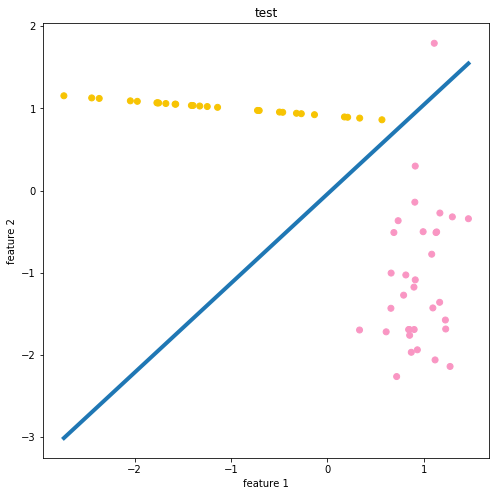

In [351]:
logistic_regressor = linear_model.LogisticRegression(penalty='l2', 
                                                     tol=1e-4,
                                                     fit_intercept=True, 
                                                     intercept_scaling=1, 
                                                     class_weight=None, 
                                                     random_state=1, 
                                                     solver='liblinear')
logistic_regressor.fit(train_data, train_labels)

w = [logistic_regressor.intercept_[0]]
w.extend(logistic_regressor.coef_[0])
w = np.array(w)
print_result(w,test_labels,logistic_regressor.predict(test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    #plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')

w:
 [-0.87980735  4.41580854 -2.74654285] 

true vs. prediction:
 [[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]] 
...


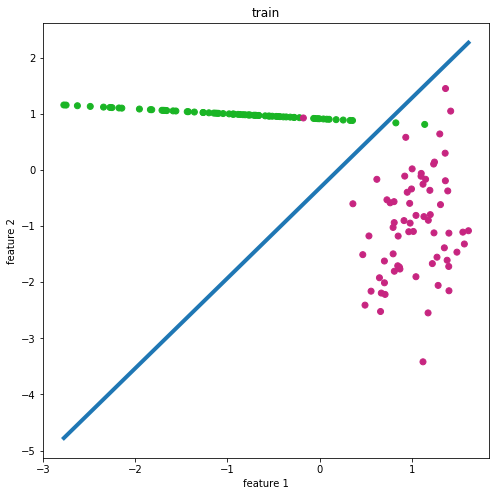

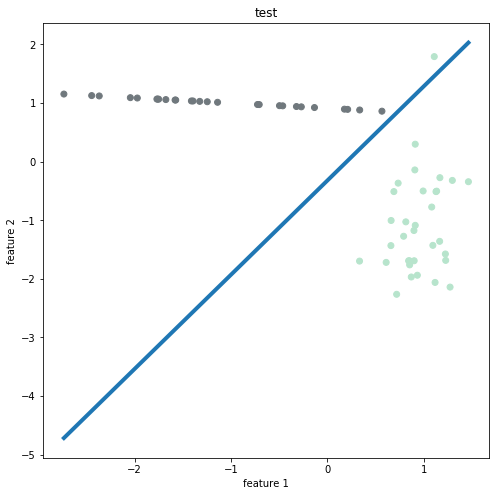

In [357]:
w = logistic_regression_fit(train_data, train_labels, 'scipy_minimize')

print_result(w,test_labels,logistic_regressor.predict(test_data))
if train_data.shape[1] == 1:
    plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')
elif train_data.shape[1] == 2:
    plot_for_two_feature(train_data, train_labels, w, 'train')
    plot_for_two_feature(test_data, test_labels, w, 'test')

In [340]:
w[:2]

array([-0.35178466, -1.98107934])

In [341]:
linear_prediction(w[:2],X)

array([-1.68110155,  1.53253649,  0.4306159 ,  0.19679672,  0.95777322])

In [ ]:
minimize(lambda w: cost_function(w, X, y, loss_f), w0).x